In [1]:
import numpy as np
from matplotlib import pyplot
import speech_recognition as sr
import time
import webbrowser as browse
import pyaudio
import struct
from pylab import *
from scipy import *
%matplotlib inline

In [2]:
kandidat=('mod', 'jokowi', 'prabowo')
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = CHUNK                 # samples per second

## Recording

In [3]:
sesi=1
bagian=1
durasi=1
oleh=kandidat[1]

In [4]:
p=pyaudio.PyAudio()
SECONDS=durasi*60

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
data=[]
for i in range(0, SECONDS):
    datahex = stream.read(CHUNK)
    dataint=array(struct.unpack(str(2 * CHUNK) + 'B', datahex), dtype='b')[::2]+.01
    data.append(dataint)
    
spectro=concatenate(data)

## Waveform

Text(0,0.5,'intensity')

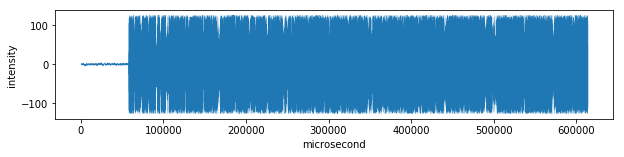

In [5]:
fig=plt.figure(figsize=(10, 2))
x=range(0,10*1024*SECONDS,5)
plot(x,spectro,'-', lw=0.1); xlabel('microsecond'); ylabel('intensity')

## Jeda

In [298]:
min(spectro)

-127.99

In [329]:
spectro1=spectro[1000:100000:10]
norm1=[ if i<0 else spectro1 for i in map(int, spectro1)]

In [331]:
len(norm1)

9900

In [325]:
len(norm)

5296